In [11]:
#IMPORTING LIBRARIES 
import pandas as pd
import os
import shutil
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colormaps
import seaborn as sns
import numpy as np
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, zscore
import scipy
from statannotations.Annotator import Annotator
plt.rcParams['font.family'] = 'Times New Roman'#PLUS SETTING FONT

In [2]:
# #LOADING COLLECTION FROM THE LARGE DATASET (GSE124814) AND PARSING
# exp = pd.read_excel('/mnt/alessandro/Volume/Maria/data/BigArray_Data/GSE124814_HW_expr_matrix.xlsx')
# sampdesc = pd.read_excel('/mnt/alessandro/Volume/Maria/data/BigArray_Data/GSE124814_sample_descriptions.xlsx',header=1)


# #PARSING
# #PARSE TITLES
# sampdesc.columns = [x.replace('characteristics: ', '') for x in sampdesc.columns]
# sampdesc.columns.values

# #ADD SUBTYPE COLUMN
# sampdesc['subtype'] = sampdesc['subgroup supplied original'].astype(str).apply(
#     lambda x: 'Alpha' if x.endswith('_alpha') 
#     else 'Beta' if x.endswith('_beta') 
#     else 'Gamma' if x.endswith('_gamma') 
#     else 'Delta' if x.endswith('_delta') 
#     else 'Not_Specified'
# )


# #PARSE SEX
# #sampdesc.loc[sampdesc['gender'].isin('female'), 'gender'] = 'F'
# sampdesc.loc[sampdesc['gender'].isin(['female','f']), 'gender'] = 'F'
# sampdesc.loc[sampdesc['gender'].isin(['male','m']), 'gender'] = 'M'
# sampdesc = sampdesc.loc[~sampdesc['gender'].isin(['mixed_sex','  '])]


# #PARSING THE AGES
# # Remove rows where age is 'adult' (case-insensitive, strip whitespace)
# sampdesc = sampdesc[~sampdesc['age'].str.strip().str.lower().eq('adult')]

# import pandas as pd
# import numpy as np
# import re

# def convert_age_to_months(age_str):
#     if pd.isna(age_str) or str(age_str).strip() == '':
#         return np.nan

#     age_str = str(age_str).strip().lower().replace(',', '.')

#     # Match years with optional decimal
#     match_years = re.match(r'(\d+(\.\d+)?)\s*years?', age_str)
#     if match_years:
#         return float(match_years.group(1)) * 12

#     # Match months with optional decimal or abbreviation
#     match_months = re.match(r'(\d+(\.\d+)?)\s*(months?|mos?|mo\.?)', age_str)
#     if match_months:
#         return float(match_months.group(1))

#     # Match single word 'month'
#     match_month = re.match(r'(\d+(\.\d+)?)\s*month', age_str)
#     if match_month:
#         return float(match_month.group(1))

#     # Match days
#     match_days = re.match(r'(\d+)\s*days?', age_str)
#     if match_days:
#         return float(match_days.group(1)) / 30.44  # average month length

#     # Match PCW (post-conception weeks)
#     match_pcw = re.match(r'(\d+(\.\d+)?)\s*pcw', age_str)
#     if match_pcw:
#         return float(match_pcw.group(1)) / 4.348  # weeks to months

#     # Match "Xyrs Ymos" format
#     match_yrs_mos = re.match(r'(\d+)yrs?\s*(\d+)mos?', age_str)
#     if match_yrs_mos:
#         return int(match_yrs_mos.group(1)) * 12 + int(match_yrs_mos.group(2))

#     # Match "XyYm" format
#     match_y_m = re.match(r'(\d+)y(\d+)m', age_str)
#     if match_y_m:
#         return int(match_y_m.group(1)) * 12 + int(match_y_m.group(2))

#     # Match "X Y" format (e.g., 18 Y or 4 PMonth)
#     match_y = re.match(r'(\d+)\s*y', age_str)
#     if match_y:
#         return int(match_y.group(1)) * 12
#     match_pm = re.match(r'(\d+)\s*pmonth', age_str)
#     if match_pm:
#         return int(match_pm.group(1))

#     # Match plain numbers — assume months
#     try:
#         return float(age_str)
#     except ValueError:
#         pass

#     # Handle 'fetal', 'adult', or anything else unknown
#     if 'fetal' in age_str or 'adult' in age_str:
#         return np.nan

#     return np.nan

# sampdesc = sampdesc.copy()
# sampdesc['age'] = sampdesc['age'].apply(convert_age_to_months) / 12
# sampdesc.rename(columns={'age': 'age_y'}, inplace=True)

# #MERGING META AND EXPRESSION DATA
# exp.rename(columns={'Gene_Symbol': 'Sample name'}, inplace=True) #Sample name
# sampdesc.rename(columns={'subgroup relabeled': 'subgroup'}, inplace=True) #Sample name

# def categorize_age(age):
#     if age < 1:
#         return '< 1'
#     elif age < 4:
#         return '< 4'
#     elif age < 8:
#         return '< 8'
#     elif age < 12:
#         return '< 12'
#     elif age < 18:
#         return '< 18'
#     elif age < 20:
#         return '<20'
#     else:
#         return '>20'
# #sampdesc['age_cat'] = sampdesc['age_y'].apply(categorize_age)

# def get_matrix(sampdesc,exp,keep):
#     cols=['Sample name']+keep
#     # matrix var holds both the variables to analyse and the expression matrix
#     matrix = pd.merge(sampdesc[cols],exp, how='left',on='Sample name')
#     matrix.set_index('Sample name', inplace=True)
#     return matrix

# keep=['age_y','gender','subgroup','subtype','source name']
# ind = 'Sample name'
# matrix = get_matrix(sampdesc,exp,keep)

# #MATRIX PARSING
# matrix['subgroup'] = matrix['subgroup'].fillna('CTRL')
# matrix.loc[matrix['subgroup'] == 'CTRL', 'subtype'] = 'CTRL'
# matrix = matrix.loc[~(matrix['subgroup'] == 'Unknown')]

# #OBTAINING TABLE WITH ONLY EXPRESSION
# def get_exp(matrix):
#     expression = matrix.copy(deep=True)
#     expression.drop(keep,axis=1, inplace=True)
#     return expression
    
# expression = get_exp(matrix)
# #OBTAINING A METADATA DF WITH ONLY THE INFORMATION I SELECTED
# sample = matrix[keep]


# #WRITING THE PARSED DATA ONTO CSV FOR FUTURE USE

#expression.to_csv('data/table/BigArrayExp.csv.gz', index=True, compression='gzip')
#sampdesc.to_csv('data/table/BigArrayMeta.csv.gz', index=False, compression='gzip')
#sample.to_csv('data/table/BigArraySample.csv.gz', index=True, compression='gzip')
#expression
#matrix.to_csv('data/table/BigArrayExp_plus_Sample.csv.gz', index=True, compression='gzip')
#matrix

In [12]:
#LOADING SAVED TABLES TO AVOID RERUNNING CODE 
expression = pd.read_csv('data/table/BigArrayExp.csv.gz',index_col=0)
sampdesc = pd.read_csv('data/table/BigArrayMeta.csv.gz')
sample = pd.read_csv('data/table/BigArraySample.csv.gz',index_col=0)
matrix = pd.read_csv('data/table/BigArrayExp_plus_Sample.csv.gz',index_col=0)

#DEFINING Z SCORE OF AGES FOR BETTER PLOTTING
sample['all_age_z'] = zscore(sample['age_y'],nan_policy='omit')

mask = sample['source name'] == 'Medulloblastoma'
sample.loc[mask, 'age_z'] = zscore(sample.loc[mask, 'age_y'], nan_policy='omit')
mask = sample['source name'] == 'Normal'
sample.loc[mask, 'age_z'] = zscore(sample.loc[mask, 'age_y'], nan_policy='omit')



def runPCA(expression, sample=None):
    print('FOR THIS FUNCTION TO WORK, INDEX OF BOTH DATASETS HAS TO BE SAMPLES (ROWS)')
    pca = PCA(n_components=2)
    vecs = pca.fit_transform(expression)
    PCA_df = pd.DataFrame(data=vecs, columns=['Principal Component 1', 'Principal Component 2'], index=expression.index)
    if sample is not None:
        PCA_df = PCA_df.join(sample)
    return PCA_df


FOR THIS FUNCTION TO WORK, INDEX OF BOTH DATASETS HAS TO BE SAMPLES (ROWS)


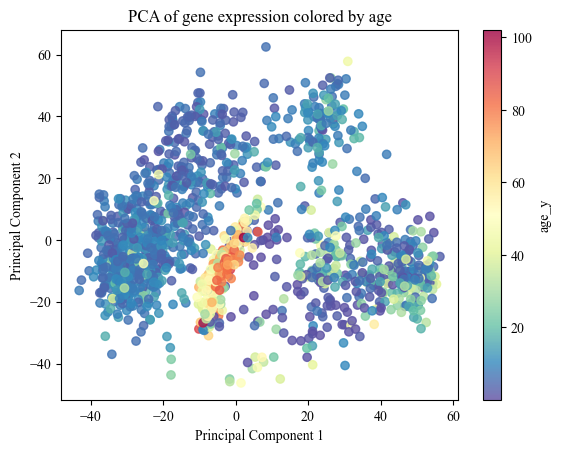

In [4]:
PCA_df = runPCA(expression,sample)

#COLORING BY AGE
scatter = plt.scatter(PCA_df['Principal Component 1'], PCA_df['Principal Component 2'], c=PCA_df['age_y'],  # Continuous variable coloring
    cmap='Spectral_r', alpha=0.8)
plt.rcParams['font.family'] = 'Times New Roman'
plt.colorbar(scatter, label='age_y')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of gene expression colored by age')
plt.show()

FOR THIS FUNCTION TO WORK, INDEX OF BOTH DATASETS HAS TO BE SAMPLES (ROWS)


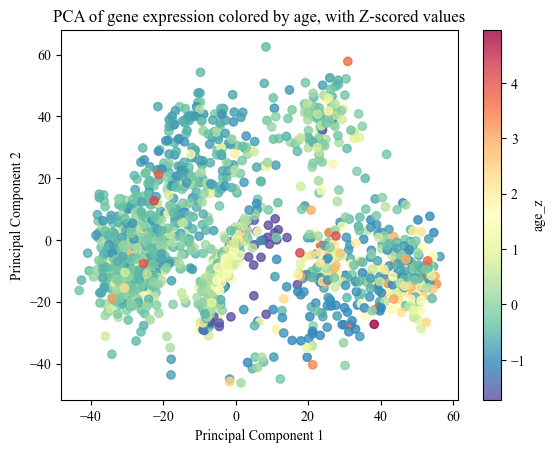

In [5]:
PCA_df = runPCA(expression,sample)

#COLORING BY AGE
scatter = plt.scatter(PCA_df['Principal Component 1'], PCA_df['Principal Component 2'], c=PCA_df['age_z'],  # Continuous variable coloring
    cmap='Spectral_r', alpha=0.8)

plt.colorbar(scatter, label='age_z')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of gene expression colored by age, with Z-scored values')
plt.show()

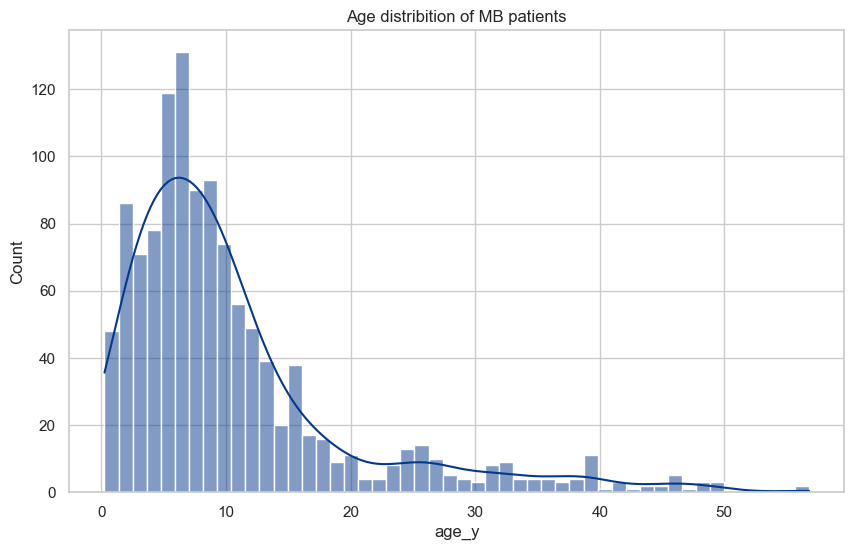

In [6]:
#HISTOGRAMS OF AGES - MB
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=sample.loc[sample['source name']=='Medulloblastoma'], x='age_y', bins=50, kde=True, color='#04388c')
plt.title('Age distribition of MB patients')
plt.show()

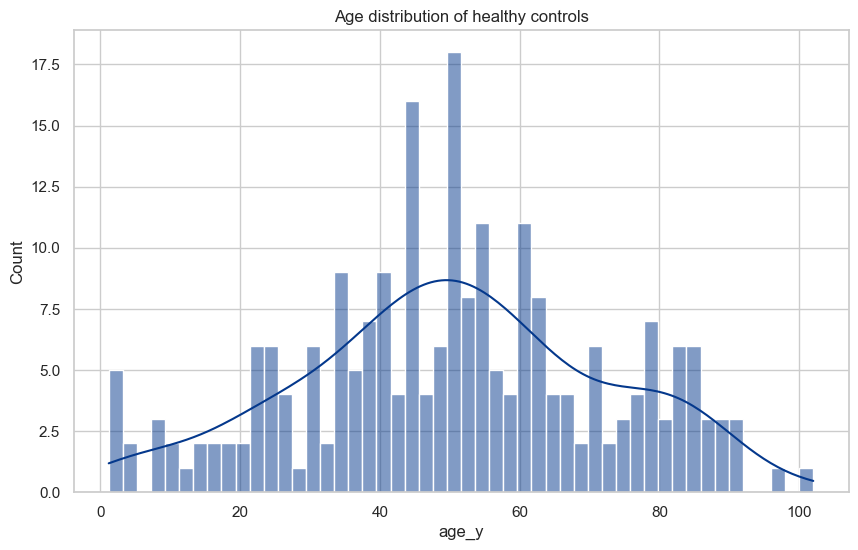

In [7]:
#HISTOGRAMS OF AGES - MB
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=sample.loc[(sample['source name']!='Medulloblastoma') & (sample['age_y']>1),], x='age_y', bins=50, kde=True, color='#04388c')
plt.title('Age distribution of healthy controls')
plt.show()

C:\Users\newma\AppData\Local\Temp\ipykernel_6448\1895149355.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x='age_y', y='Group', palette=['#04388c', '#a83232'])


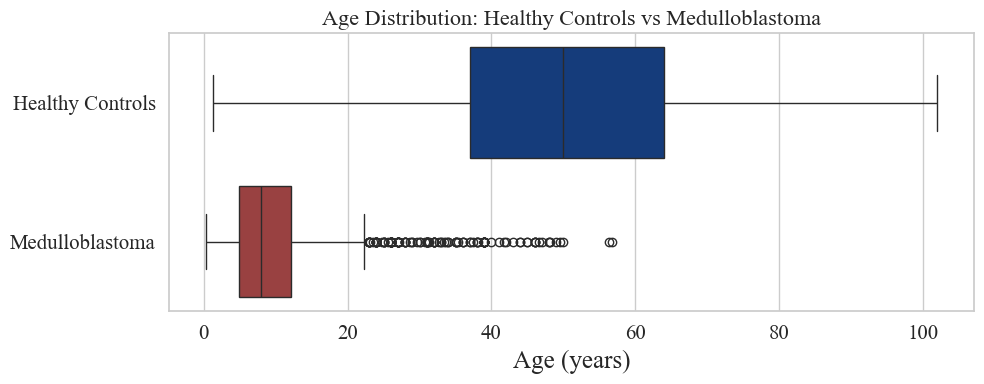

In [8]:
#BOXPLOTTING THE AGE DISTRIBUTIONS
healthy = sample.loc[(sample['source name'] != 'Medulloblastoma') & (sample['age_y'] > 1)].copy()
healthy['Group'] = 'Healthy Controls'

mb = sample.loc[sample['source name'] == 'Medulloblastoma'].copy()
mb['Group'] = 'Medulloblastoma'

# Combine them into one DataFrame
combined = pd.concat([healthy, mb])

# Plot
plt.figure(figsize=(10, 4))  # Wider, shorter for side-by-side boxplots
plt.rcParams['font.family'] = 'Times New Roman'
sns.boxplot(data=combined, x='age_y', y='Group', palette=['#04388c', '#a83232'])

# Set font sizes
plt.title('Age Distribution: Healthy Controls vs Medulloblastoma', fontsize=16)
plt.xlabel('Age (years)', fontsize=18)
plt.ylabel('', fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()


In [9]:
print(f'CTRL MEAN = {sample.loc[sample['source name']!='Medulloblastoma']['age_y'].mean()}')
print(f'MB MEAN = {sample.loc[sample['source name']=='Medulloblastoma']['age_y'].mean()}')
print(f'CTRL SD = {sample.loc[sample['source name']!='Medulloblastoma']['age_y'].std()}')
print(f'MB SD = {sample.loc[sample['source name']=='Medulloblastoma']['age_y'].std()}') 

CTRL MEAN = 44.548249879839794
MB MEAN = 10.500754237288135
CTRL SD = 25.961111490953027
MB SD = 9.354925277588073


In [10]:
100 - (sample['subtype'].value_counts()['Not_Specified'].sum() /( sample['subtype'].value_counts().sum() - sample['subtype'].value_counts()['CTRL'].sum()))*100 
#sample['subtype'].value_counts()

57.309486780715396

Text(0.5, 1.0, 'PCA of gene expression coloured by healthy vs diseased')

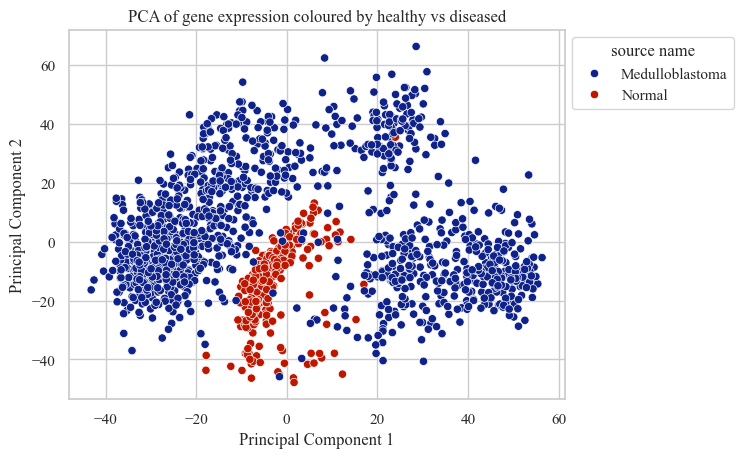

In [11]:
#PCA of gene expression coloured by healthy vs diseased
plot = sns.scatterplot(data=PCA_df, x='Principal Component 1', y='Principal Component 2', 
                       hue="source name", 
                       palette = ["#0e228a","#bf1600"])
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

plot.set_title('PCA of gene expression coloured by healthy vs diseased')

Text(0.5, 1.0, 'PCA of gene expression coloured by sex')

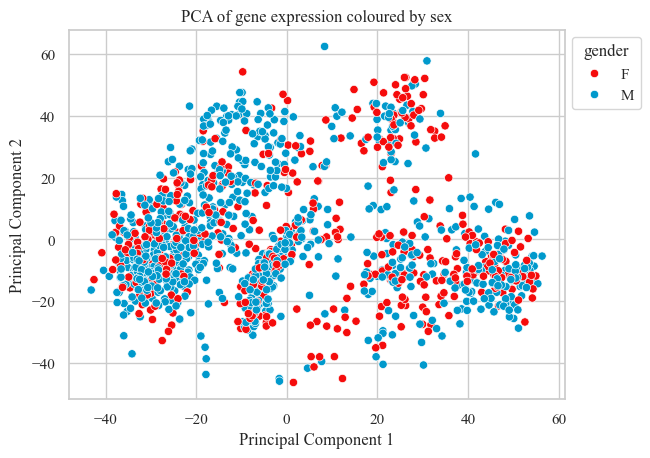

In [12]:
#PCA of gene expression coloured by sex'
palette = ["#f50c0c","#0099CC"]
plot = sns.scatterplot(data=PCA_df, x='Principal Component 1', y='Principal Component 2', hue="gender",palette = palette)
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot.set_title('PCA of gene expression coloured by sex')

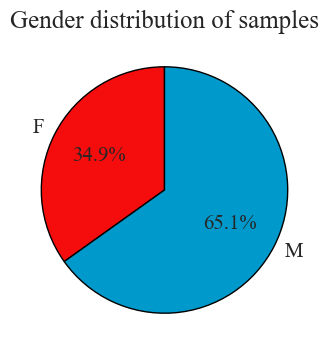

In [13]:
#PIE CHART OF SEX DISTRIBUTION
gender_counts = sample['gender'].value_counts()

labels = ['F', 'M']
sizes = [gender_counts.get('F', 0), gender_counts.get('M', 0)]

plt.figure(figsize=(4, 4))
plt.pie(
    sizes,
    labels=labels,
    colors=palette,
    autopct=lambda p: f'{p:.1f}%',  # Keeps 1 decimal
    startangle=90,
    textprops={'fontsize': 15},     # Label font size
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

plt.title('Gender distribution of samples', fontsize=18)
plt.show()


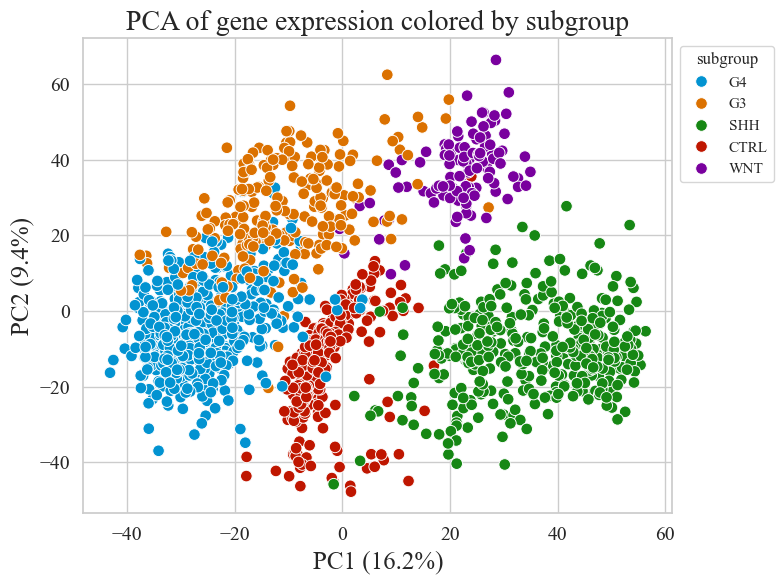

In [14]:
expression = expression.loc[sample.index]
pca = PCA(n_components=2)
components = pca.fit_transform(expression)

PCA_df = pd.DataFrame(components, columns=['Principal Component 1', 'Principal Component 2'], index=expression.index)
PCA_df = PCA_df.join(sample[['subgroup']])

explained = pca.explained_variance_ratio_ * 100

palette_subg = [ 
    '#0293d1',  # G4
    '#db7100',  # G3
    '#168714',  # SHH
    '#bf1600',  # CTRL
    '#79009e'   # WNT
]

plt.figure(figsize=(8, 6))
plot = sns.scatterplot(
    data=PCA_df,
    x='Principal Component 1',
    y='Principal Component 2',
    hue='subgroup',
    palette=palette_subg,
    s=70
)

sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1), title_fontsize=12, fontsize=11)

plot.set_title('PCA of gene expression colored by subgroup', fontsize=20)
plot.set_xlabel(f'PC1 ({explained[0]:.1f}%)', fontsize=18)
plot.set_ylabel(f'PC2 ({explained[1]:.1f}%)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


In [15]:
sample['gender'].value_counts() 

gender
M    906
F    485
Name: count, dtype: int64

In [16]:
#TSNE


tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(expression)
tsne.kl_divergence_

tsne_df = pd.DataFrame(data=X_tsne, columns=['tSNE 1', 'tSNE 2'])

sampleS = sample.reset_index()

tsne_df = pd.merge(tsne_df,sampleS,left_index=True, right_index=True)
tsne_df = tsne_df.set_index('Sample name')


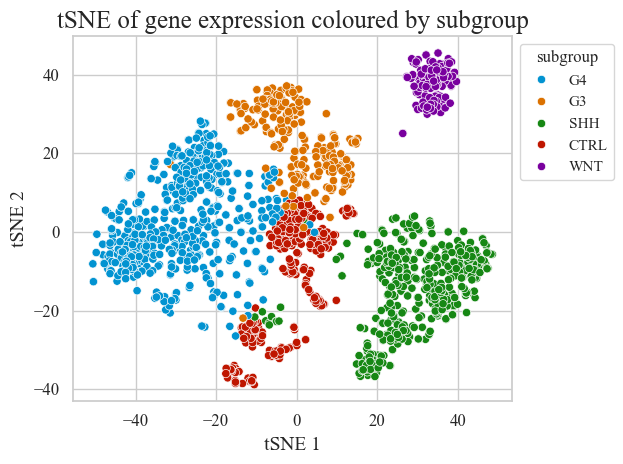

In [17]:
#tSNE of gene expression coloured by subgroup
plot = sns.scatterplot(data=tsne_df, x='tSNE 1', y='tSNE 2', hue="subgroup", palette=palette_subg)

sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

plot.set_title('tSNE of gene expression coloured by subgroup', fontsize=18)
plot.set_xlabel('tSNE 1', fontsize=14)
plot.set_ylabel('tSNE 2', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()
#plotfigure.savefig("tsne_subs.png", dpi=300, bbox_inches='tight')

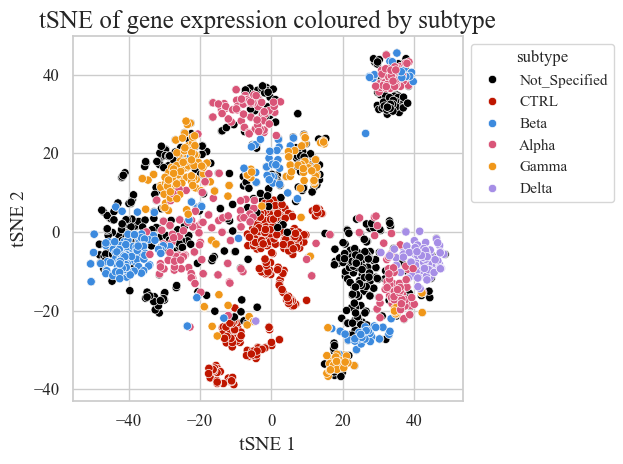

In [18]:
#tSNE of gene expression coloured by subtype
palette_subtype = [ '#000000', #Not Specified
           '#bf1600', #CTRL
           '#3c8ade', #Beta
           '#d95578', #Alpha
           '#f0971a', #Gamma
            '#a68ee6' #Delta
                    ]
plot = sns.scatterplot(data=tsne_df, x='tSNE 1', y='tSNE 2', hue="subtype",palette=palette_subtype)
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot.set_title('tSNE of gene expression coloured by subtype', fontsize=18)
plot.set_xlabel('tSNE 1', fontsize=14)
plot.set_ylabel('tSNE 2', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

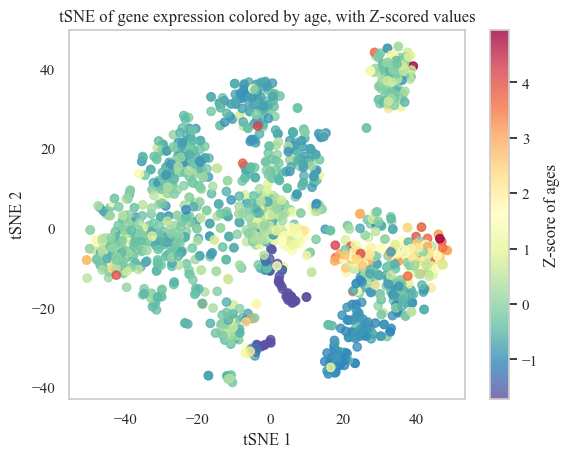

In [19]:
#COLORING BY AGE
scatter = plt.scatter(tsne_df['tSNE 1'], tsne_df['tSNE 2'], c=tsne_df['age_z'],  
    cmap='Spectral_r', alpha=0.8)

plt.colorbar(scatter, label='Z-score of ages')
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')
plt.title('tSNE of gene expression colored by age, with Z-scored values')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'tSNE of gene expression coloured by gender')

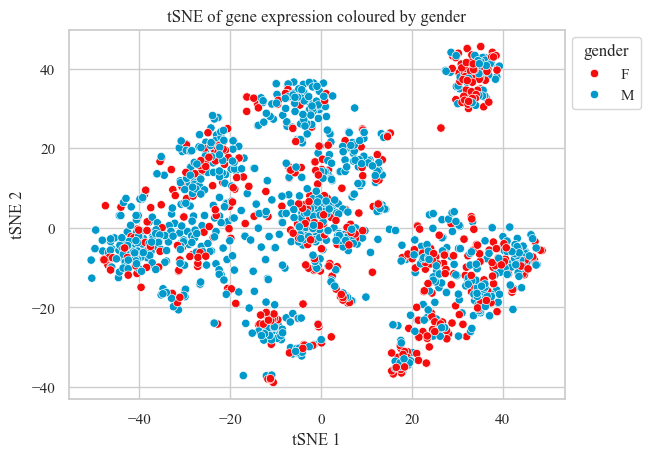

In [20]:
#tSNE of gene expression coloured by gender
palette = ["#f50c0c","#0099CC"]
plot = sns.scatterplot(data=tsne_df, x='tSNE 1', y='tSNE 2', hue="gender",palette=palette)
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot.set_title('tSNE of gene expression coloured by gender')

In [21]:
#MELTING NO SUBSETTING
expression = expression.reset_index() #RUN THIS ONLY ONCE
matrix = matrix.reset_index()
#MELTING NO SUBSETTING
melted = pd.melt(expression, id_vars='Sample name', var_name='variable', value_name='value')
melted['condition'] = 0
genes = ['MYC']
melted.loc[melted['variable'].isin(genes), 'condition'] = 1 #THIS IS A WAY TO EASILY ISOLATE THE TARGET GENES (IN THIS CASE MYC)

melted = pd.merge(melted, sample, on='Sample name', how='left')



#SUBGROUPING
melted['age_group'] = melted['age_y'].apply(lambda x: 'age < 20' if x < 20 else 'age ≥ 20')
melted['age_group_z'] = melted['age_z'].apply(lambda x: 'Z < 0' if x < 0 else 'Z ≥ 0')

F = melted.loc[melted['gender']=='F']
M = melted.loc[melted['gender']=='M']
young = melted.loc[melted['age_group']=='age < 20']
old = melted.loc[melted['age_group']!='age < 20']

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

M_0 vs. M_1: t-test independent samples, P_val:3.917e-01 t=8.566e-01
F_0 vs. F_1: t-test independent samples, P_val:3.395e-01 t=-9.551e-01
F_1 vs. M_1: t-test independent samples, P_val:6.281e-01 t=4.845e-01
F_0 vs. M_0: t-test independent samples, P_val:1.993e-01 t=-1.283e+00


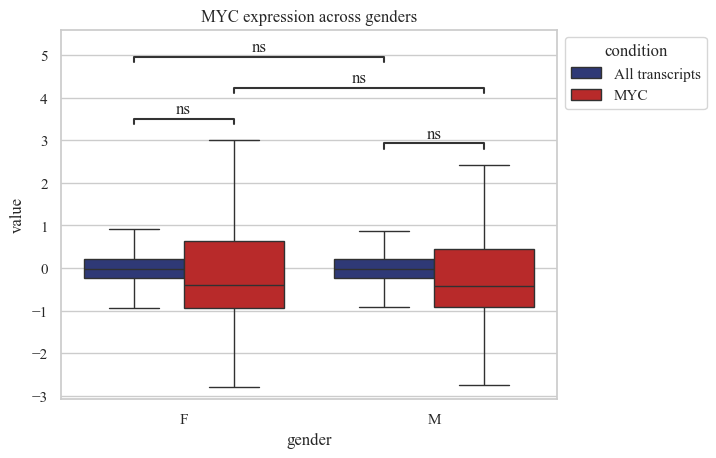

In [22]:
#MYC expression across genders
palette_hue = ['#233182', '#cf1313']


plot = sns.boxplot(
    data=melted, x='gender', y='value', hue='condition',
    showfliers=False, palette=palette_hue
)
plot.set_title('MYC expression across genders')

# DEFINING PAIRS
pairs = [
    (("F", 0), ("F", 1)),
    (("M", 0), ("M", 1)),
    (("F", 1), ("M", 1)),
    (("F", 0), ("M", 0)),
]


# STATISTICAL SIGNIFICANCE
annotator = Annotator(plot, pairs, data=melted, x='gender', y='value', hue='condition', pvalue_correction="fdr_bh")
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()


#PLOTTING DETAILS
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
new_labels = ['All transcripts', 'MYC']
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles=handles, labels=new_labels, title="condition", loc="upper left", bbox_to_anchor=(1, 1))

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

age ≥ 20_0 vs. age ≥ 20_1: t-test independent samples, P_val:2.400e-30 t=1.145e+01
age < 20_0 vs. age < 20_1: t-test independent samples, P_val:4.906e-08 t=-5.455e+00


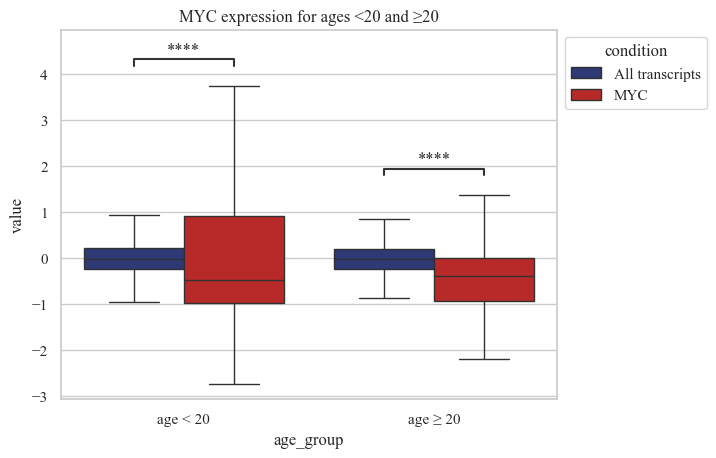

In [23]:
#MYC expression for ages <20 and >20

plot = sns.boxplot(
    data=melted,
    x='age_group',
    y='value',
    hue='condition',
    showfliers=False,
    palette=palette_hue
)
plot.set_title('MYC expression for ages <20 and ≥20')

# DEFINING PAIRS
pairs = [
    (('age < 20', 0), ('age < 20', 1)),
    (('age ≥ 20', 0), ('age ≥ 20', 1)),
]

# STATISTICAL SIGNIFICANCE
annotator = Annotator(plot, pairs, data=melted, x='age_group', y='value', hue='condition', pvalue_correction="fdr_bh")
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

#PLOTTING DETAILS
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles=handles, labels=['All transcripts', 'MYC'], title='condition', loc='upper left', bbox_to_anchor=(1, 1))


In [24]:
melted['age_group_z'].unique()

array(['Z < 0', 'Z ≥ 0'], dtype=object)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Z ≥ 0_0 vs. Z ≥ 0_1: t-test independent samples, P_val:2.245e-12 t=7.018e+00
Z < 0_0 vs. Z < 0_1: t-test independent samples, P_val:3.611e-05 t=-4.131e+00


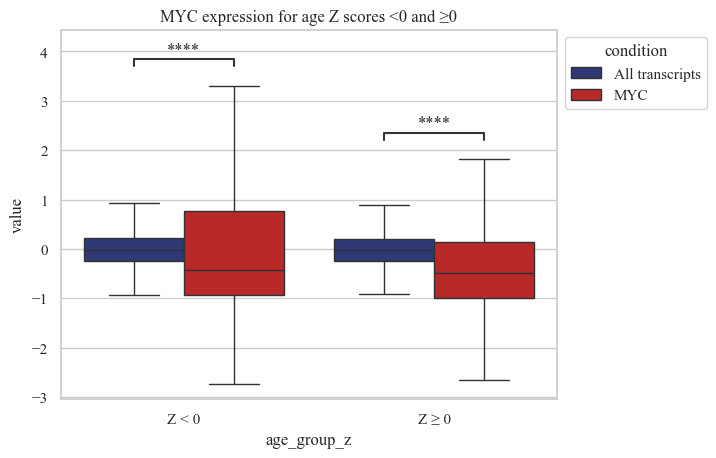

In [25]:
#MYC expression for Z scores

plot = sns.boxplot(
    data=melted,
    x='age_group_z',
    y='value',
    hue='condition',
    showfliers=False,
    palette=palette_hue
)
plot.set_title('MYC expression for age Z scores <0 and ≥0')

# DEFINING PAIRS
pairs = [
    (('Z < 0', 0), ('Z < 0', 1)),
    (('Z ≥ 0', 0), ('Z ≥ 0', 1)),
]

# STATISTICAL SIGNIFICANCE
annotator = Annotator(plot, pairs, data=melted, x='age_group_z', y='value', hue='condition', pvalue_correction="fdr_bh")
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

#PLOTTING DETAILS
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles=handles, labels=['All transcripts', 'MYC'], title='condition', loc='upper left', bbox_to_anchor=(1, 1))


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

G3_0 vs. G3_1: t-test independent samples, P_val:0.000e+00 t=-4.738e+01
G4_0 vs. G4_1: t-test independent samples, P_val:4.617e-152 t=2.627e+01
SHH_0 vs. SHH_1: t-test independent samples, P_val:3.589e-139 t=2.511e+01
CTRL_0 vs. CTRL_1: t-test independent samples, P_val:1.657e-53 t=1.540e+01
WNT_0 vs. WNT_1: t-test independent samples, P_val:2.783e-229 t=-3.233e+01


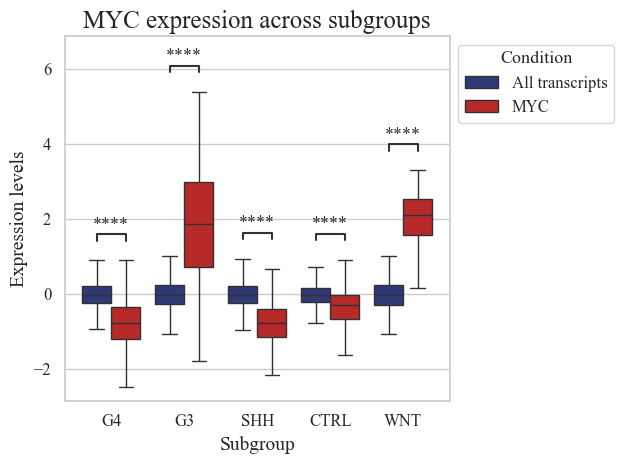

In [38]:
#MYC expression across subgroups
palette_hue = ['#233182', '#cf1313']

plot = sns.boxplot(
    data=melted,
    x='subgroup',
    y='value',
    hue='condition',
    showfliers=False,
    palette=palette_hue
)

plot.set_title('MYC expression across subgroups', fontsize=18)
plot.set_ylabel('Expression levels', fontsize=14)
plot.set_xlabel('Subgroup', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

subgroup_list = melted['subgroup'].unique()
pairs = [((sg, 0), (sg, 1)) for sg in subgroup_list]

annotator = Annotator(
    plot, pairs, data=melted,
    x='subgroup', y='value', hue='condition',
    pvalue_correction="fdr_bh"
)
annotator.configure(test='t-test_ind', text_format='star', loc='inside', fontsize=13)
annotator.apply_and_annotate()

sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

handles, labels = plot.get_legend_handles_labels()
plot.legend(
    handles=handles,
    labels=['All transcripts', 'MYC'],
    title='Condition',
    title_fontsize=13,
    fontsize=12,
    loc='upper left',
    bbox_to_anchor=(1, 1)
)

plt.tight_layout()
plt.show()
plot.legend(handles=handles, labels=['All transcripts', 'MYC'], title='condition', loc='upper left', bbox_to_anchor=(1, 1))
# plot.figure.savefig("MYC_expression_across_subgroups.pdf", bbox_inches='tight')
plot.figure.savefig("MYC_expression_across_subgroups.png", dpi=300, bbox_inches='tight')


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

G3_0 vs. G3_1: t-test independent samples, P_val:3.562e-265 t=-3.479e+01
CTRL_0 vs. CTRL_1: t-test independent samples, P_val:1.657e-53 t=1.540e+01


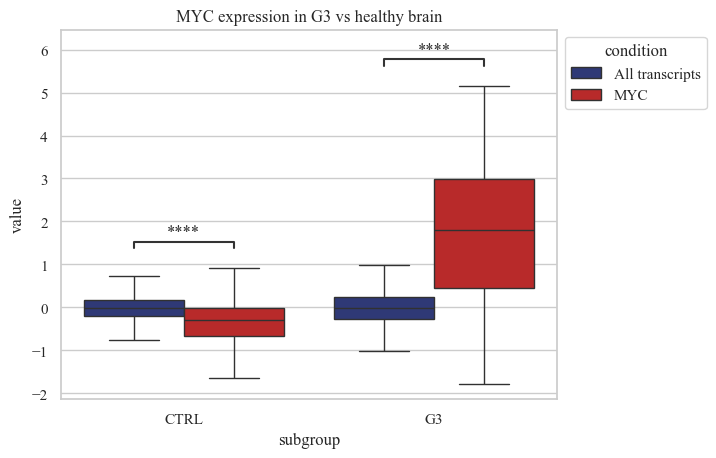

In [27]:
#MYC expression in G3 vs healthy brain
subset = melted.loc[((melted['subgroup'] == 'G3') | (melted['subgroup'] == 'CTRL' )) & (melted['subtype'] != 'Not_Specified')]
subset = subset.copy(deep=True)

palette_hue = ['#233182', '#cf1313']  


plot = sns.boxplot(
    data=subset,
    x='subgroup',
    y='value',
    hue='condition',
    showfliers=False,
    palette=palette_hue
)
plot.set_title('MYC expression in G3 vs healthy brain')

subgroup_list = subset['subgroup'].unique()
pairs = [((sg, 0), (sg, 1)) for sg in subgroup_list]


annotator = Annotator(plot, pairs, data=subset, x='subgroup', y='value', hue='condition', pvalue_correction="fdr_bh")
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
handles, labels = plot.get_legend_handles_labels()
plot.legend(
    handles=handles,
    labels=['All transcripts', 'MYC'],
    title='condition',
    loc='upper left',
    bbox_to_anchor=(1, 1)
)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Beta_0 vs. Beta_1: t-test independent samples, P_val:1.214e-128 t=-2.414e+01
Alpha_0 vs. Alpha_1: t-test independent samples, P_val:5.854e-12 t=-6.883e+00
Gamma_0 vs. Gamma_1: t-test independent samples, P_val:3.661e-258 t=-3.434e+01


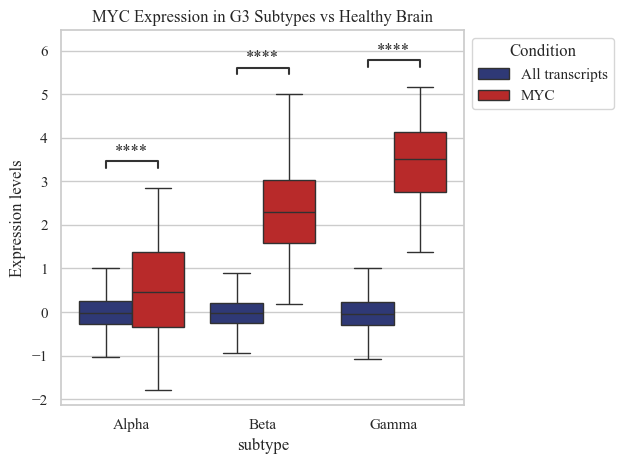

In [28]:
# Subset for G3 and healthy brain only, excluding 'Not_Specified' subtypes
subset = melted.loc[(melted['subgroup'] == 'G3') & (melted['subtype'] != 'Not_Specified'),].copy()

# Color palette for MYC vs background
palette_hue = ['#233182', '#cf1313']  # Blue for all transcripts, red for MYC

# Plot
plot = sns.boxplot(
    data=subset,
    x='subtype',
    y='value',
    hue='condition',
    showfliers=False,
    palette=palette_hue
)

# Title
plot.set_title('MYC Expression in G3 Subtypes vs Healthy Brain')
plot.set_ylabel('Expression levels')
# Generate statistical test pairs based on subtypes
subtype_list = subset['subtype'].unique()
pairs = [((sg, 0), (sg, 1)) for sg in subtype_list]

# Add statistical annotations
annotator = Annotator(
    plot,
    pairs,
    data=subset,
    x='subtype',
    y='value',
    hue='condition',
    pvalue_correction="fdr_bh"
)
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

# Move and clean legend
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
handles, labels = plot.get_legend_handles_labels()
plot.legend(
    handles=handles,
    labels=['All transcripts', 'MYC'],
    title='Condition',
    loc='upper left',
    bbox_to_anchor=(1, 1)
)

# Show
plt.tight_layout()
plt.show()

In [29]:
G3 = melted.loc[(melted['subgroup'] == 'G3') & (melted['subtype'] != 'Not Specified'),]

In [30]:
melted.loc[(melted['subgroup'] == 'G3') & (melted['subtype'] == 'Gamma'),]['age_y'].mean()
melted.loc[(melted['subgroup'] == 'G3') & (melted['subtype'] == 'Gamma'),]['age_y'].std()

5.737871853570555

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

SHH_0 vs. SHH_1: t-test independent samples, P_val:9.192e-45 t=1.404e+01
G4_0 vs. G4_1: t-test independent samples, P_val:1.432e-39 t=1.316e+01
G3_0 vs. G3_1: t-test independent samples, P_val:7.199e-90 t=-2.010e+01
CTRL_0 vs. CTRL_1: t-test independent samples, P_val:3.390e-11 t=6.629e+00
WNT_0 vs. WNT_1: t-test independent samples, P_val:1.087e-118 t=-2.317e+01


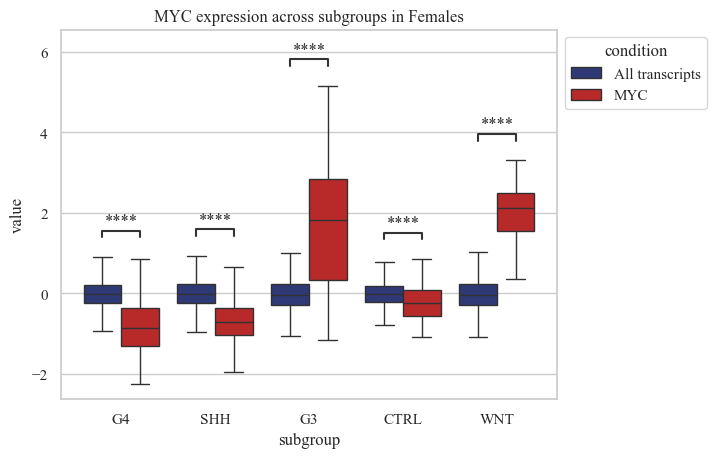

In [31]:
#MYC expression across subgroups in FEMALES

plot = sns.boxplot(
    data=F,
    x='subgroup',
    y='value',
    hue='condition',
    showfliers=False,
    palette=palette_hue
)
plot.set_title('MYC expression across subgroups in Females')

subgroup_list = F['subgroup'].unique()
pairs = [((sg, 0), (sg, 1)) for sg in subgroup_list]

annotator = Annotator(plot, pairs, data=F ,x='subgroup', y='value', hue='condition', pvalue_correction="fdr_bh")
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles=handles, labels=['All transcripts', 'MYC'], title='condition', loc='upper left', bbox_to_anchor=(1, 1))


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

G3_0 vs. G3_1: t-test independent samples, P_val:0.000e+00 t=-3.925e+01
G4_0 vs. G4_1: t-test independent samples, P_val:2.894e-97 t=2.093e+01
SHH_0 vs. SHH_1: t-test independent samples, P_val:1.035e-72 t=1.804e+01
CTRL_0 vs. CTRL_1: t-test independent samples, P_val:5.045e-24 t=1.011e+01
WNT_0 vs. WNT_1: t-test independent samples, P_val:5.852e-85 t=-1.954e+01


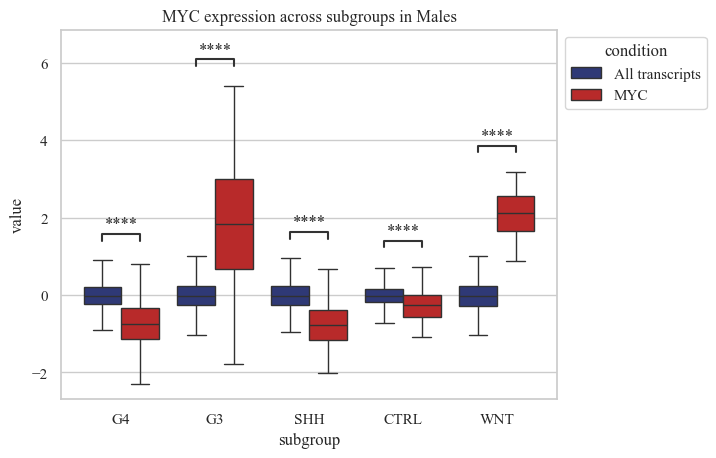

In [32]:
#MYC expression across subgroups in MALES

plot = sns.boxplot(
    data=M,
    x='subgroup',
    y='value',
    hue='condition',
    showfliers=False,
    palette=palette_hue
)
plot.set_title('MYC expression across subgroups in Males')

subgroup_list = M['subgroup'].unique()
pairs = [((sg, 0), (sg, 1)) for sg in subgroup_list]

annotator = Annotator(plot, pairs, data=M, x='subgroup', y='value', hue='condition', pvalue_correction="fdr_bh")
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles=handles, labels=['All transcripts', 'MYC'], title='condition', loc='upper left', bbox_to_anchor=(1, 1))


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

G3_0 vs. G3_1: t-test independent samples, P_val:0.000e+00 t=-4.417e+01
G4_0 vs. G4_1: t-test independent samples, P_val:1.547e-137 t=2.496e+01
SHH_0 vs. SHH_1: t-test independent samples, P_val:1.057e-107 t=2.205e+01
WNT_0 vs. WNT_1: t-test independent samples, P_val:4.684e-198 t=-3.003e+01
CTRL_0 vs. CTRL_1: t-test independent samples, P_val:5.694e-01 t=5.690e-01


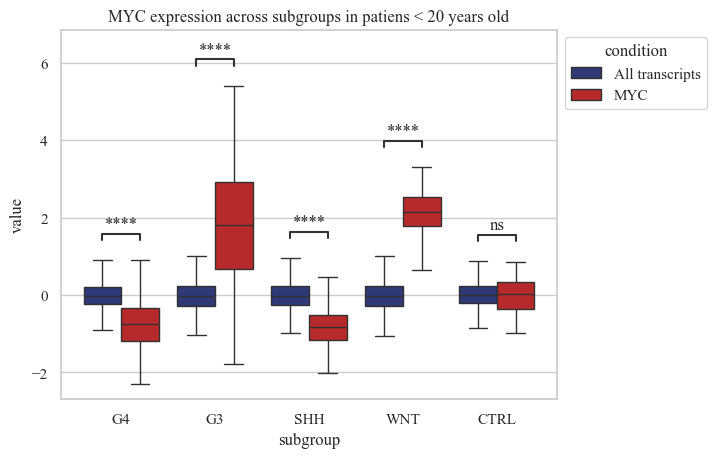

In [33]:
#MYC expression across subgroups in YOUNG

plot = sns.boxplot(
    data=young,
    x='subgroup',
    y='value',
    hue='condition',
    showfliers=False,
    palette=palette_hue
)
plot.set_title('MYC expression across subgroups in patiens < 20 years old')

subgroup_list = young['subgroup'].unique()
pairs = [((sg, 0), (sg, 1)) for sg in subgroup_list]

annotator = Annotator(plot, pairs, data=young ,x='subgroup', y='value', hue='condition', pvalue_correction="fdr_bh")
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles=handles, labels=['All transcripts', 'MYC'], title='condition', loc='upper left', bbox_to_anchor=(1, 1))


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WNT_0 vs. WNT_1: t-test independent samples, P_val:1.796e-34 t=-1.225e+01
CTRL_0 vs. CTRL_1: t-test independent samples, P_val:1.307e-66 t=1.724e+01
SHH_0 vs. SHH_1: t-test independent samples, P_val:1.715e-35 t=1.243e+01
G3_0 vs. G3_1: t-test independent samples, P_val:6.755e-66 t=-1.715e+01
G4_0 vs. G4_1: t-test independent samples, P_val:1.426e-16 t=8.263e+00


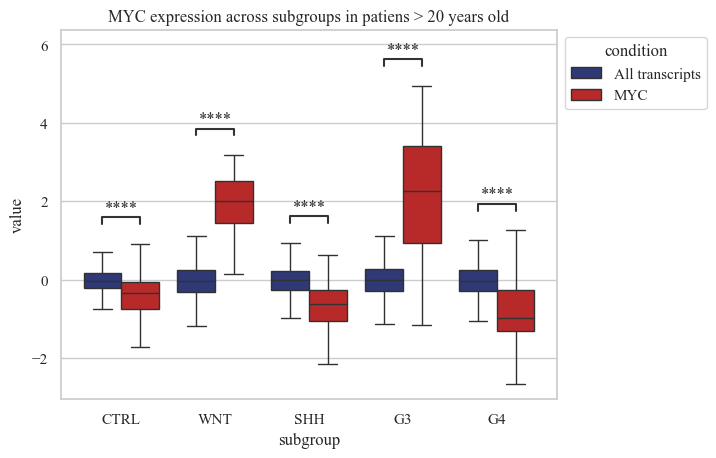

In [34]:
#MYC expression across subgroups in OLD

plot = sns.boxplot(
    data=old,
    x='subgroup',
    y='value',
    hue='condition',
    showfliers=False,
    palette=palette_hue
)
plot.set_title('MYC expression across subgroups in patiens > 20 years old')

subgroup_list = old['subgroup'].unique()
pairs = [((sg, 0), (sg, 1)) for sg in subgroup_list]

annotator = Annotator(plot, pairs, data=old ,x='subgroup', y='value', hue='condition', pvalue_correction="fdr_bh")
annotator.configure(test='t-test_ind', text_format='star', loc='inside')
annotator.apply_and_annotate()

sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
handles, labels = plot.get_legend_handles_labels()
plot.legend(handles=handles, labels=['All transcripts', 'MYC'], title='condition', loc='upper left', bbox_to_anchor=(1, 1))


FOR THIS FUNCTION TO WORK, INDEX OF BOTH DATASETS HAS TO BE SAMPLES (ROWS)


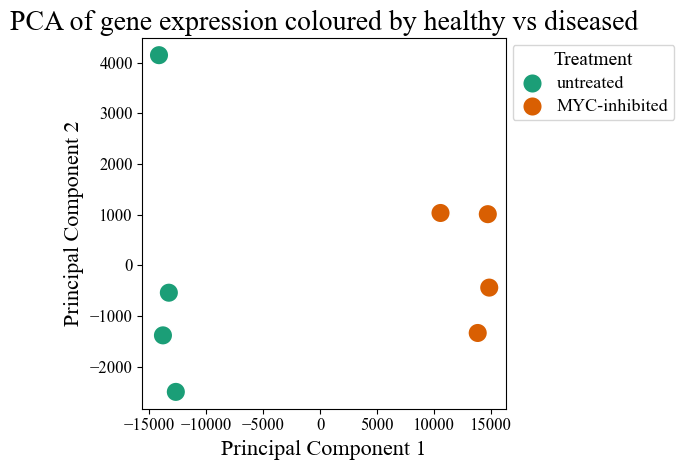

In [17]:
#OMOMYC RE-ANALYSIS2srat = pd.read_csv('data/table/GSE171117.SraRunTable.csv')[['Run', 'treatment']]
srat.set_index('Run', inplace=True)

omomyc_fpkm = pd.read_csv('data/table/OMOMYC_FILTERED_FPKM.csv.gz')
omomyc_fpkm.rename(columns={'Unnamed: 0': 'GeneID'}, inplace=True)
omomyc_fpkm.set_index('GeneID', inplace=True)
omomyc_fpkm = omomyc_fpkm.T

PCA_df = runPCA(expression=omomyc_fpkm, sample=srat)

plot = sns.scatterplot(
    data=PCA_df,
    x='Principal Component 1',
    y='Principal Component 2',
    hue='treatment',
    s=200,
    palette=["#1b9e77", "#d95f02"]  # New palette
)

sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot.set_title('PCA of gene expression coloured by healthy vs diseased', fontsize=20)
plot.set_xlabel('Principal Component 1', fontsize=16)
plot.set_ylabel('Principal Component 2', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

legend = plot.get_legend()
if legend:
    legend.set_title('Treatment', prop={'size': 14})
    for text in legend.get_texts():
        text.set_fontsize(13)

plt.tight_layout()
plt.show()


C:\Users\newma\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


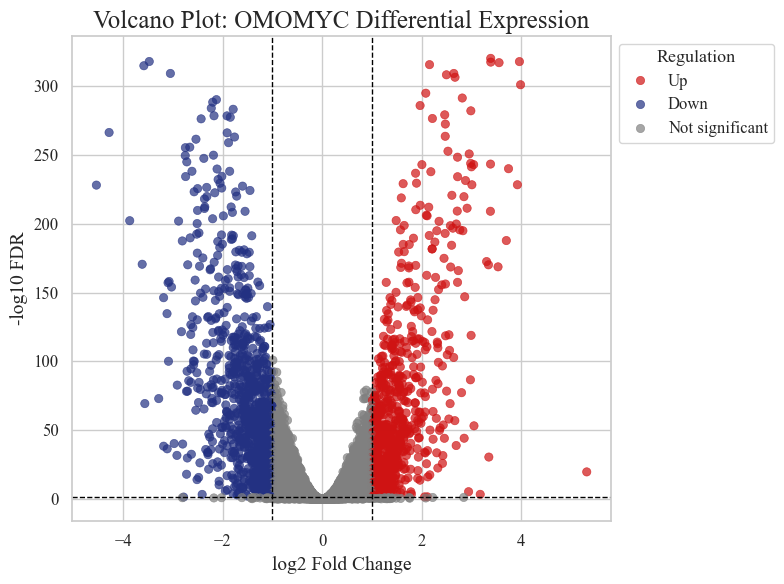

In [41]:
omomyc = pd.read_csv('data/table/OMOMYC_EDGER_RESULTS.csv')
omomyc.rename(columns={'gene': 'ensembl_gene_id'}, inplace=True)
omomyc = omomyc.merge(
    pd.read_csv('data/genlist/OMOMYC_EXPRESSED_ensmbl.txt', sep='\t'),
    on='ensembl_gene_id'
).drop(columns=['ensembl_gene_id', 'external_gene_name'])

def classify_gene(row):
    if row['FDR'] < 0.05 and row['logFC'] >= 1:
        return 'Up'
    elif row['FDR'] < 0.05 and row['logFC'] <= -1:
        return 'Down'
    else:
        return 'Not significant'

omomyc['regulation'] = omomyc.apply(classify_gene, axis=1)
omomyc['neg_log10_FDR'] = -np.log10(omomyc['FDR'])

plt.figure(figsize=(8, 6))
plot = sns.scatterplot(
    data=omomyc,
    x='logFC',
    y='neg_log10_FDR',
    hue='regulation',
    palette={'Up': '#cf1313', 'Down': '#233182', 'Not significant': 'grey'},
    alpha=0.7,
    edgecolor=None
)

plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
plt.axvline(x=-1, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-np.log10(0.05), color='black', linestyle='--', linewidth=1)

plt.xlabel('log2 Fold Change', fontsize=14)
plt.ylabel('-log10 FDR', fontsize=14)
plt.title('Volcano Plot: OMOMYC Differential Expression', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

legend = plot.legend(title='Regulation', loc='upper left', bbox_to_anchor=(1, 1))
legend.set_title('Regulation', prop={'size': 13})
for text in legend.get_texts():
    text.set_fontsize(12)

plt.tight_layout()
plt.show()


In [52]:
#LOADING THE EDGER RESULTS (R-SCRIPT OUTPUT)
omomyc = pd.read_csv('data/table/OMOMYC_EDGER_RESULTS.csv')
omomyc.rename(columns={'gene': 'ensembl_gene_id'},inplace=True)
omomyc = omomyc.merge(pd.read_csv('data/genlist/OMOMYC_EXPRESSED_ensmbl.txt',sep='\t'),on='ensembl_gene_id').drop(columns=['ensembl_gene_id','external_gene_name'])
omomyc = omomyc.loc[(omomyc['FDR'] < 0.05) & (omomyc['logFC'].abs() >= 1)]
up = omomyc.loc[omomyc['logFC'] > 0, 'hgnc_symbol'].tolist()
down = omomyc.loc[omomyc['logFC'] < 0, 'hgnc_symbol'].tolist()

#GO FOR OMOMYC SYSTEM - RESULTS OBTAINED FROM WEBGESTAT SERVER
keep = ['description','size','pValue','FDR','userId']
BP_UP = pd.read_csv('data/GO/GO_BP/enrichment_results_wg_result1749054737_OMO_UP.txt',sep='\t')[keep]
BP_DOWN = pd.read_csv('data/GO/GO_BP/enrichment_results_wg_result1749054737_OMO_DOWN.txt',sep='\t')[keep]
CC_UP = pd.read_csv('data/GO/GO_CC/enrichment_results_wg_result1749054947_OMO_UP.txt',sep='\t')[keep]
CC_DOWN = pd.read_csv('data/GO/GO_CC/enrichment_results_wg_result1749054947_OMO_DOWN.txt',sep='\t')[keep]
MF_UP = pd.read_csv('data/GO/GO_MF/enrichment_results_wg_result1749054958_OMO_UP.txt',sep='\t')[keep]
MF_DOWN = pd.read_csv('data/GO/GO_MF/enrichment_results_wg_result1749054958_OMO_DOWN.txt',sep='\t')[keep]



def plot_go_bar(df, title="GO Enrichment", size_col='size', color_col='FDR', desc_col='description', 
                order_by='FDR', cmap_name="flare_r", colorbar_ylim=None):
    if order_by == 'FDR':
        df = df.sort_values(color_col).copy()
    elif order_by == 'size':
        df = df.sort_values(size_col, ascending=False).copy()
    else:
        raise ValueError("order_by must be either 'FDR' or 'size'")

    if colorbar_ylim is not None:
        vmin, vmax = colorbar_ylim
    else:
        vmin, vmax = df[color_col].min(), df[color_col].max()

    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = sns.color_palette(cmap_name, as_cmap=True)
    colors = [cmap(norm(val)) for val in df[color_col]]

    fig, ax = plt.subplots(figsize=(10, 8))

    bars = ax.barh(
        y=df[desc_col], 
        width=df[size_col], 
        color=colors,
        edgecolor='black',
        linewidth=1
    )

    ax.invert_yaxis()

    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label(color_col, fontsize=14)
    cbar.ax.tick_params(labelsize=12)
    if colorbar_ylim is not None:
        cbar.set_clim(*colorbar_ylim)

    ax.set_xlabel("Gene Set Size", fontsize=16)
    ax.set_ylabel("GO Term", fontsize=16)
    ax.set_title(title, fontsize=20)
    ax.tick_params(axis='both', labelsize=18.5)

    plt.tight_layout()
    plt.show()


In [43]:
len(up)

813

In [ ]:
len(down)

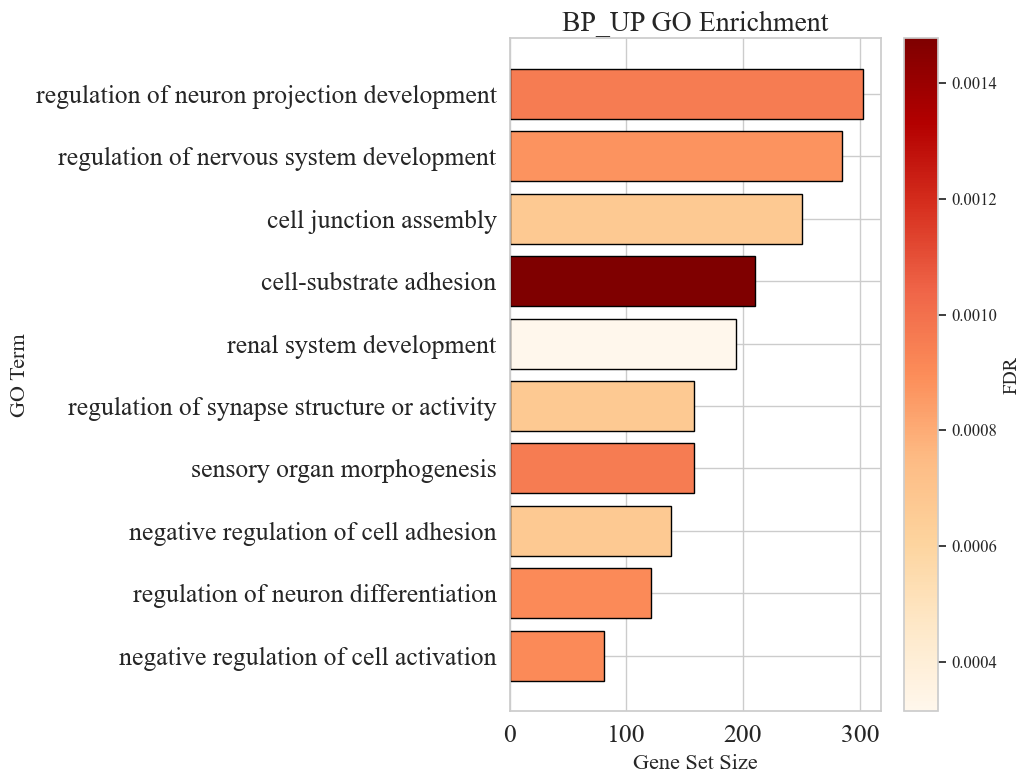

In [53]:
plot_go_bar(BP_UP, title="BP_UP GO Enrichment", order_by='size',cmap_name='OrRd')

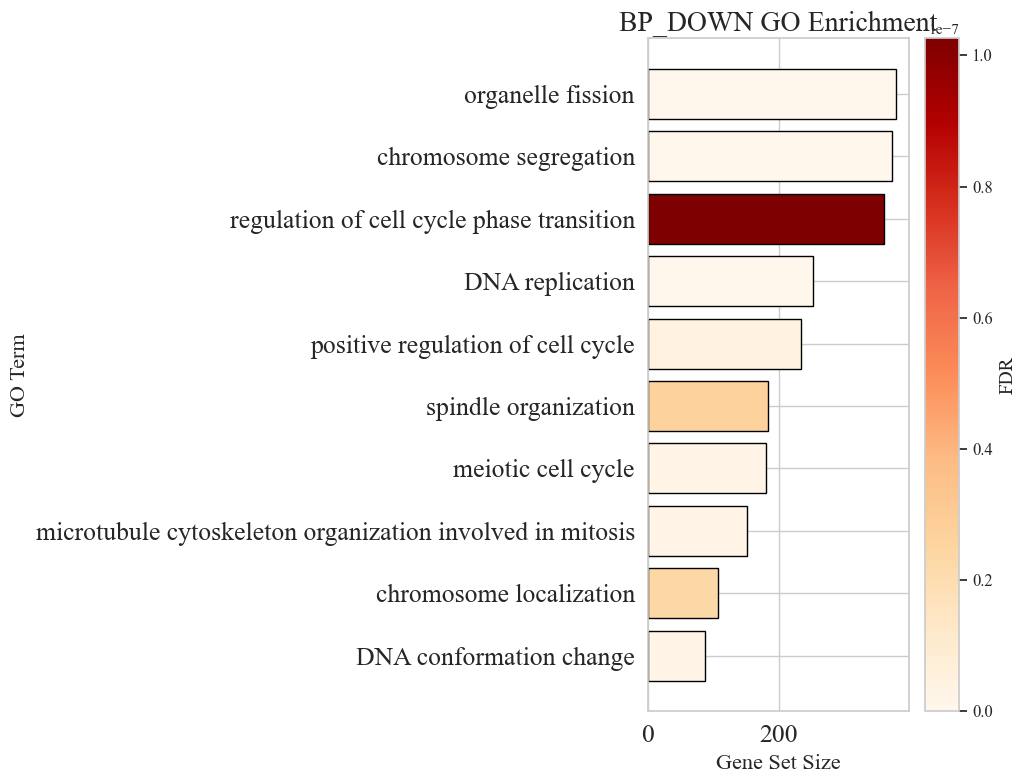

In [54]:
plot_go_bar(BP_DOWN, title="BP_DOWN GO Enrichment", order_by='size',cmap_name='OrRd')

In [ ]:
plot_go_bar(CC_UP, title="CC_UP GO Enrichment", order_by='size')

In [ ]:
plot_go_bar(CC_DOWN, title="CC_DOWN GO Enrichment", order_by='size')

In [ ]:
plot_go_bar(MF_UP, title="MF_UP GO Enrichment", order_by='size')

In [ ]:
plot_go_bar(MF_DOWN, title="MF_DOWN GO Enrichment", order_by='size')

In [18]:
# EXCTRACTING CORR MATRIX
# matrix_corr = zscored_matrix.corr(method='spearman')
# matrix_corr
# matrix_corr.to_csv('data/table/BigArray_SPCORR.csv.gz',compression='gzip')
omomyc_ens = pd.read_csv('data/genlist/OMOMYC_EXPRESSED_ensmbl.txt',sep='\t')

sp_corr  = pd.read_csv('data/table/BigArray_SPCORR.csv.gz')

sp_corr.rename(columns={'Unnamed: 0': 'hgnc_symbol'},inplace=True)

universe = list(set(omomyc_ens['hgnc_symbol'].tolist()))

filtered_corr = sp_corr[sp_corr['hgnc_symbol'].isin(universe)]

#ISOLATING THE MYC CORRELATIONS
Array_MYC_corr = filtered_corr[['hgnc_symbol', 'MYC']].copy()

#ISOLATING THE UP AND DOWNREGULATED GENES IN THE OMOMYC SYSTEM, THEN ANNOTATING TO THE CORRELATIONS
up = omomyc.loc[omomyc['logFC'] > 0, 'hgnc_symbol'].tolist()
down = omomyc.loc[omomyc['logFC'] < 0, 'hgnc_symbol'].tolist()

# # EXPORTING TO FILE FOR WEBGESTAT USE
# with open("data/genlist/OMO_UP.txt", "w") as outfile:
#     outfile.write("\n".join(str(item) for item in up))

# with open("data/genlist/OMO_DOWN.txt", "w") as outfile:
#     outfile.write("\n".join(str(item) for item in down))

# with open("data/genlist/universe.txt", "w") as outfile:
#     outfile.write("\n".join(str(item) for item in universe))


Array_MYC_corr['label'] = 'Normal/Undetected'
Array_MYC_corr.loc[Array_MYC_corr['hgnc_symbol'].isin(up), 'label'] = 'Up'
Array_MYC_corr.loc[Array_MYC_corr['hgnc_symbol'].isin(down), 'label'] = 'Down'

#CLEANING
Array_MYC_corr['label'].value_counts()
Array_MYC_corr.dropna()
Array_MYC_corr.drop_duplicates()
Array_MYC_corr['label'].value_counts()

#COMPUTING Z SCORE OF MYC COLUMN
Array_MYC_corr['zscore'] = zscore(Array_MYC_corr['MYC'], nan_policy='omit')

C:\Users\newma\AppData\Local\Temp\ipykernel_20880\2340125106.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.boxplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Down vs. Normal/Undetected: t-test independent samples, P_val:3.616e-14 t=7.586e+00
Normal/Undetected vs. Up: t-test independent samples, P_val:1.690e-02 t=2.389e+00
Down vs. Up: t-test independent samples, P_val:3.563e-10 t=6.503e+00


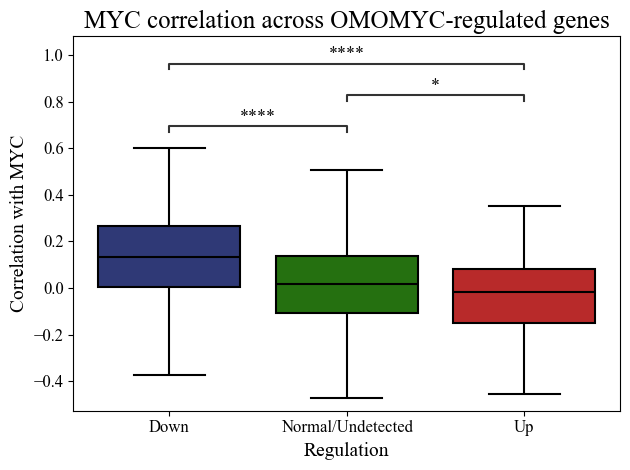

In [19]:
plt.rcParams['font.family'] = 'Times New Roman'

x_order = ['Down', 'Normal/Undetected', 'Up']

line_style = dict(color='black', linewidth=1.5)

plot = sns.boxplot(
    data=Array_MYC_corr,
    x='label',
    y='MYC',
    order=x_order,
    palette={
        'Up': '#cf1313',
        'Down': '#233182',
        'Normal/Undetected': '#1c8000'
    },
    medianprops=line_style,
    whiskerprops=line_style,
    capprops=line_style,
    boxprops=dict(edgecolor='black', linewidth=1.5),
    showfliers=False,
)

valid_pairs = [
    ('Down', 'Normal/Undetected'),
    ('Normal/Undetected', 'Up'),
    ('Down', 'Up')
]

annotator = Annotator(plot, valid_pairs, data=Array_MYC_corr, x='label', y='MYC', order=x_order)
annotator.configure(test='t-test_ind', text_format='star', loc='inside', fontsize=13)
annotator.apply_and_annotate()

plt.title("MYC correlation across OMOMYC-regulated genes", fontsize=18)
plt.xlabel("Regulation", fontsize=14)
plt.ylabel("Correlation with MYC", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


C:\Users\newma\AppData\Local\Temp\ipykernel_20880\721096361.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


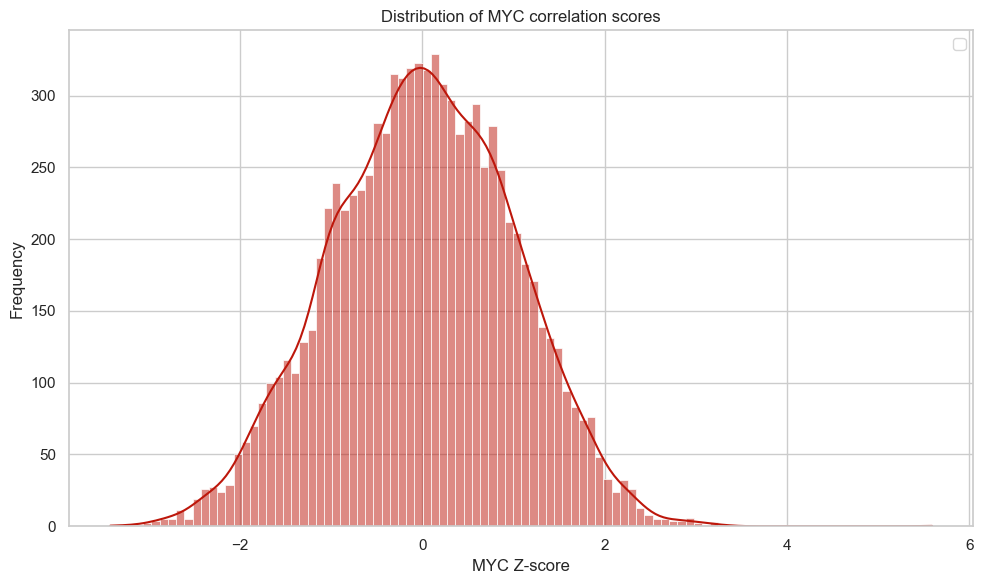

In [20]:
#PLOTTING DISTRUBUTION TO CHECK FOR NORMALITY
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=Array_MYC_corr, x='zscore', bins=100, kde=True, color='#bd170b')

plt.title('Distribution of MYC correlation scores')
plt.xlabel('MYC Z-score')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

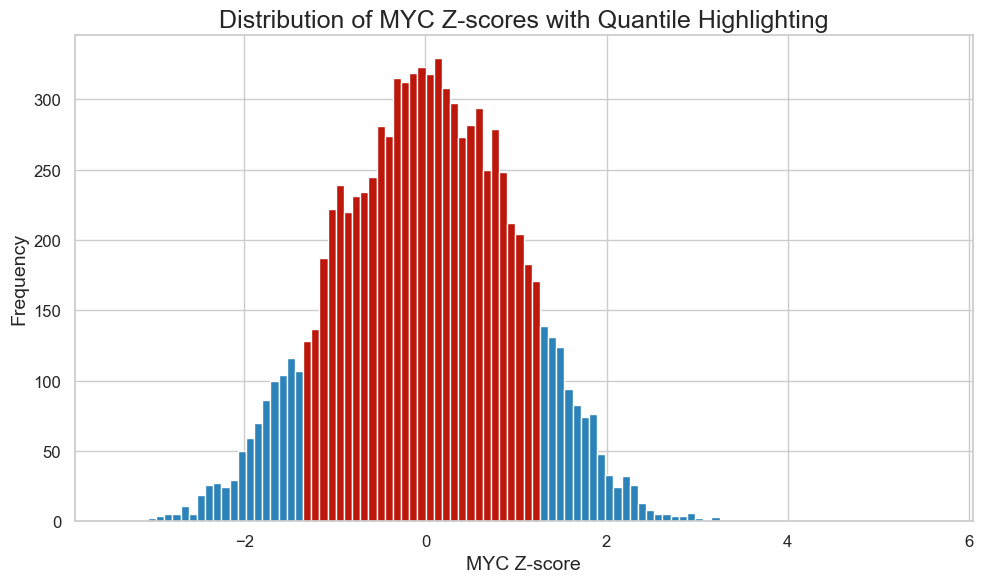

In [21]:
plt.rcParams['font.family'] = 'Times New Roman'

q90 = Array_MYC_corr['zscore'].quantile(0.9)
q10 = Array_MYC_corr['zscore'].quantile(0.1)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

counts, bins = np.histogram(Array_MYC_corr['zscore'], bins=100)

for i in range(len(bins) - 1):
    bin_left = bins[i]
    bin_right = bins[i + 1]
    bin_center = (bin_left + bin_right) / 2

    if bin_center <= q10:
        color = '#2b83ba'
    elif bin_center >= q90:
        color = '#2b83ba'
    else:
        color = '#bd170b'

    plt.bar(bin_center, counts[i], width=(bin_right - bin_left), color=color, align='center')

plt.title('Distribution of MYC Z-scores with Quantile Highlighting', fontsize=18)
plt.xlabel('MYC Z-score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [22]:
# TOP  AND BOTTOM 10% GENES
top_genes = Array_MYC_corr[Array_MYC_corr['zscore'] > q90]

bottom_genes = Array_MYC_corr[Array_MYC_corr['zscore'] < q10]

nUP =Array_MYC_corr['label'].value_counts()['Up']
nDOWN =Array_MYC_corr['label'].value_counts()['Down']

In [ ]:
percent_df

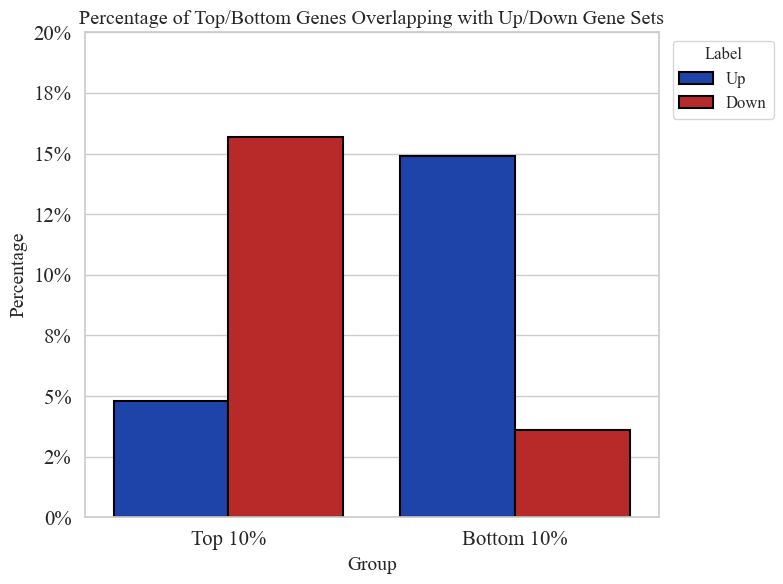

In [78]:
plt.rcParams['font.family'] = 'Times New Roman'

perc_top_down = (top_genes['label'].value_counts().get('Down', 0) / len(down)) * 100
perc_top_up = (top_genes['label'].value_counts().get('Up', 0) / len(up)) * 100
perc_bottom_down = (bottom_genes['label'].value_counts().get('Down', 0) / len(down)) * 100
perc_bottom_up = (bottom_genes['label'].value_counts().get('Up', 0) / len(up)) * 100

data = {
    'Group': ['Top 10%', 'Top 10%', 'Bottom 10%', 'Bottom 10%'],
    'Label': ['Up', 'Down', 'Up', 'Down'],
    'Percentage': [
        perc_top_up,
        perc_top_down,
        perc_bottom_up,
        perc_bottom_down
    ]
}

percent_df = pd.DataFrame(data)

palette_hue = ['#073ac1', '#cf1313']

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=percent_df, x='Group', y='Percentage', hue='Label', palette=palette_hue)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

plt.title('Percentage of Top/Bottom Genes Overlapping with Up/Down Gene Sets', fontsize=14.5)
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('Group', fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 20)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))

ax.legend(
    title='Label',
    title_fontsize=12,
    fontsize=12,
    loc='upper left',
    bbox_to_anchor=(1.01, 1)
)

plt.tight_layout()
plt.show()


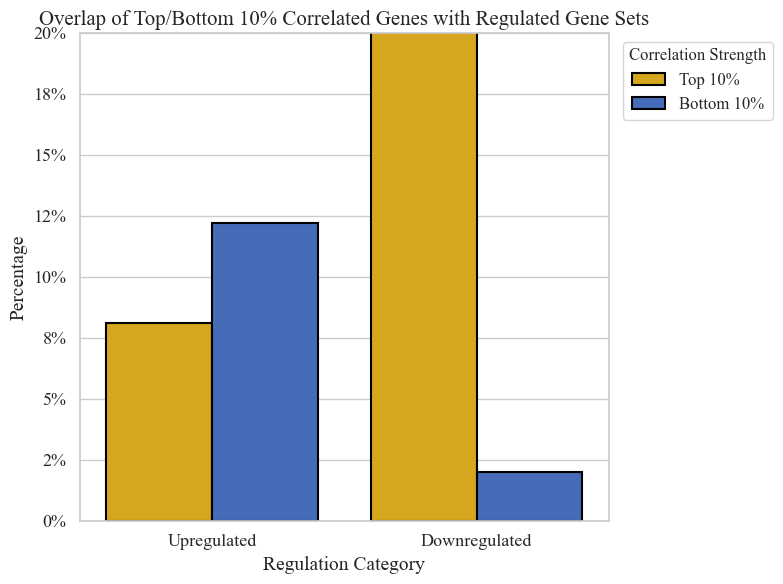

In [23]:
plt.rcParams['font.family'] = 'Times New Roman'

perc_top_down = (top_genes['label'].value_counts().get('Down', 0) / len(down)) * 100
perc_top_up = (top_genes['label'].value_counts().get('Up', 0) / len(up)) * 100
perc_bottom_down = (bottom_genes['label'].value_counts().get('Down', 0) / len(down)) * 100
perc_bottom_up = (bottom_genes['label'].value_counts().get('Up', 0) / len(up)) * 100

data = {
    'Label': ['Upregulated', 'Upregulated', 'Downregulated', 'Downregulated'],
    'Group': ['Top 10%', 'Bottom 10%', 'Top 10%', 'Bottom 10%'],
    'Percentage': [
        perc_top_up,
        perc_bottom_up,
        perc_top_down,
        perc_bottom_down
    ]
}

percent_df = pd.DataFrame(data)

palette_group = ['#f4b400', '#3366cc']  # yellow for Top 10%, blue for Bottom 10%

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=percent_df, x='Label', y='Percentage', hue='Group', palette=palette_group)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

plt.title('Overlap of Top/Bottom 10% Correlated Genes with Regulated Gene Sets', fontsize=15)
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('Regulation Category', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0, 20)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))

ax.legend(
    title='Correlation Strength',
    title_fontsize=12,
    fontsize=12,
    loc='upper left',
    bbox_to_anchor=(1.01, 1)
)

plt.tight_layout()
plt.show()


In [62]:
from scipy.stats import fisher_exact

# Count how many 'Up' and 'Down' genes are in total
n_up = Array_MYC_corr['label'].value_counts().get('Up', 0)
n_down = Array_MYC_corr['label'].value_counts().get('Down', 0)
n_total = len(Array_MYC_corr)

# Helper to build contingency tables and run test
def fisher_enrichment(set_genes, label, total_label_count):
    a = set_genes['label'].value_counts().get(label, 0)  # In set and labeled
    b = total_label_count - a                           # Not in set but labeled
    c = len(set_genes) - a                              # In set but not labeled
    d = n_total - (a + b + c)                           # Not in set and not labeled
    table = [[a, b], [c, d]]
    odds_ratio, p_value = fisher_exact(table, alternative='greater')
    return p_value

# Compute p-values
p_top_up = fisher_enrichment(top_genes, 'Up', n_up)
p_top_down = fisher_enrichment(top_genes, 'Down', n_down)
p_bottom_up = fisher_enrichment(bottom_genes, 'Up', n_up)
p_bottom_down = fisher_enrichment(bottom_genes, 'Down', n_down)

print(f"Top 10% ∩ Up:     p = {p_top_up:.4e}")
print(f"Top 10% ∩ Down:   p = {p_top_down:.4e}")
print(f"Bottom 10% ∩ Up:  p = {p_bottom_up:.4e}")
print(f"Bottom 10% ∩ Down: p = {p_bottom_down:.4e}")


Top 10% ∩ Up:     p = 9.9985e-01
Top 10% ∩ Down:   p = 1.9846e-19
Bottom 10% ∩ Up:  p = 4.2352e-13
Bottom 10% ∩ Down: p = 1.0000e+00


In [63]:
#Exporting lists
with open("data/genlist/CORR_TOP.txt", "w") as outfile:
    outfile.write("\n".join(str(item) for item in top_genes['hgnc_symbol'].tolist()))

with open("data/genlist/CORR_BOTTOM.txt", "w") as outfile:
    outfile.write("\n".join(str(item) for item in bottom_genes['hgnc_symbol'].tolist()))


In [64]:
#plotting GO
top_set = set(top_genes['hgnc_symbol'])
bottom_set = set(bottom_genes['hgnc_symbol'])

# Define a function to process any dataframe
def process_go(df, intersect_set, colname_prefix):
    df = df.copy()  # to avoid modifying original
    df['gene_list'] = df['userId'].apply(lambda x: x.split(';') if pd.notnull(x) else [])
    df[f'{colname_prefix}_matches'] = df['gene_list'].apply(lambda genes: len(intersect_set.intersection(genes)))
    df[f'{colname_prefix}_percentage'] = df[f'{colname_prefix}_matches'] / df['gene_list'].apply(len) * 100
    return df

# Apply processing
BP_UP = process_go(BP_UP, bottom_set, 'bottom')
BP_DOWN = process_go(BP_DOWN, top_set, 'top')


CC_UP = process_go(CC_UP, bottom_set, 'bottom')
CC_DOWN = process_go(CC_DOWN, top_set, 'top')

MF_UP = process_go(MF_UP, bottom_set, 'bottom')
MF_DOWN = process_go(MF_DOWN, top_set, 'top')


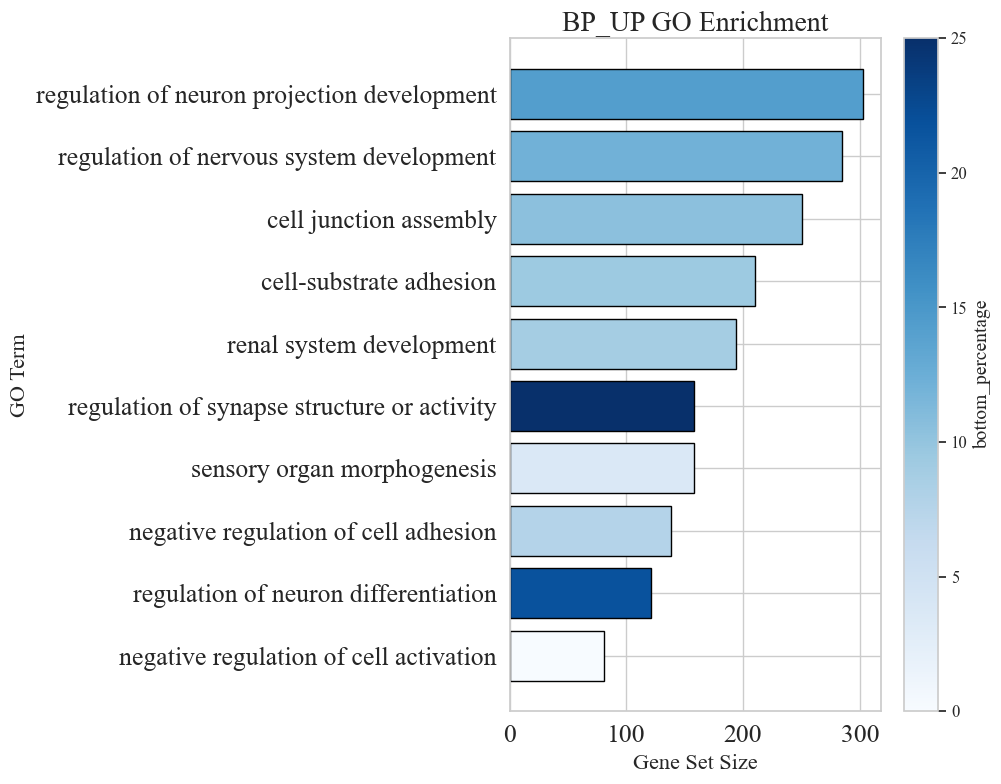

In [79]:
plot_go_bar(BP_UP, title="BP_UP GO Enrichment", color_col='bottom_percentage', order_by='size',cmap_name='Blues')

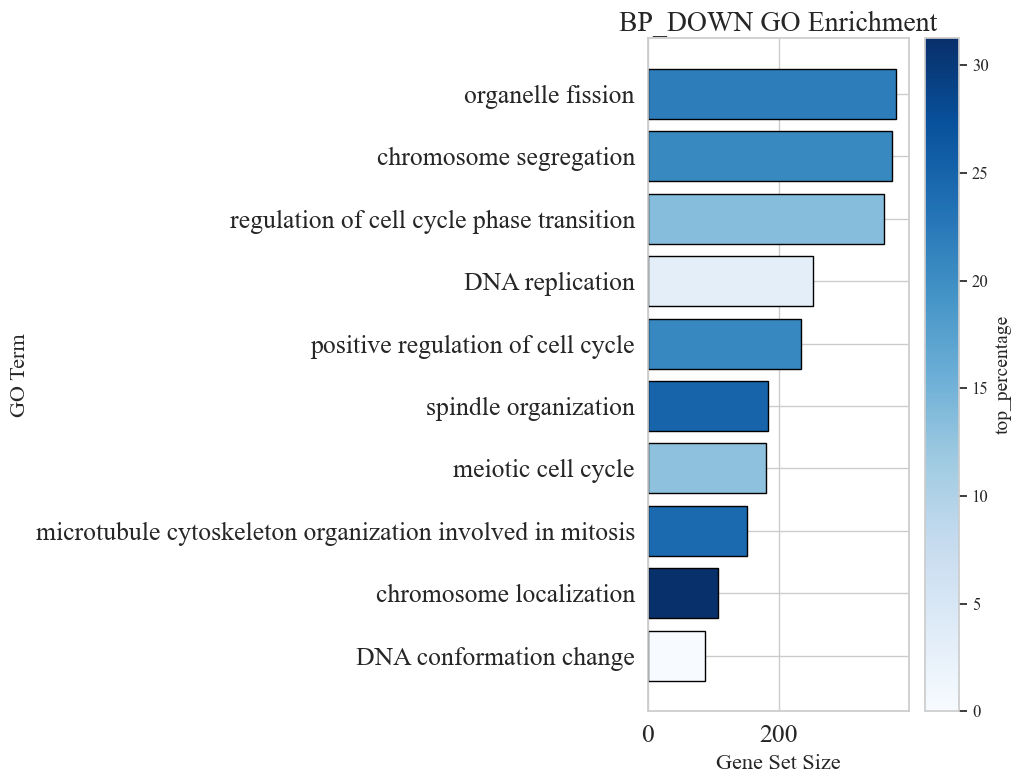

In [80]:
plot_go_bar(BP_DOWN, title="BP_DOWN GO Enrichment", color_col='top_percentage', order_by='size',cmap_name='Blues')

In [ ]:
plot_go_bar(MF_UP, title="MF_UP GO Enrichment", color_col='bottom_percentage', order_by='size')

In [ ]:
plot_go_bar(MF_DOWN, title="MF_DOWN GO Enrichment", color_col='top_percentage', order_by='size')

In [ ]:
plot_go_bar(CC_UP, title="CC_UP GO Enrichment", color_col='bottom_percentage', order_by='size')

In [ ]:
plot_go_bar(CC_DOWN, title="CC_DOWN GO Enrichment", color_col='top_percentage', order_by='size')

In [ ]:
A = BP_UP.loc[BP_UP['description']=='regulation of synapse structure or activity']['gene_list']
A = A.values[0]  # or list(A.values[0]) to be explicit
up
targs = [x for x in A if x in list(bottom_set)]
len(targs)
omomyc.loc[omomyc['hgnc_symbol'].isin(targs)]


In [ ]:
print('The end :-)')